# Monitoring the IO performance of the LCLS xtc filesystems

Six files on every ost from ana02, ana11 and ana12 were repeadatly read. All files were between 10 to 20 GB large but 
only the first 5MB were read using dd:
>  dd if=file_on_ost of=/dev/null bs=1M count=5000

The files that were used are ~wilko/projects/fs/mon_perf/list1_anaNN with NN=(02,11,12)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [21]:
#dat = pd.read_csv("/reg/neh/home/wilko/projects/fs/mon_perf/all_08_0622.csv")
dat = pd.read_csv("/reg/neh/home/wilko/projects/fs/mon_perf/all_curr.csv")
dat.head()
cut = (dat.rate < 1000)
dat.loc[ ~cut ].head()

,oid,nfiles,start,elap,fn,fsz,rate,rutime,rstime,rmaxrss,rinblk,rnvcsw,rnivcsw,fs
8454,32,6,1.529539e+09,1.2,/reg/data/ana12/cxi/data_backup/gaffney_jul12/...,5368709120,4389.6,0.65,669.2,5524,1908436888,141589,1766,12


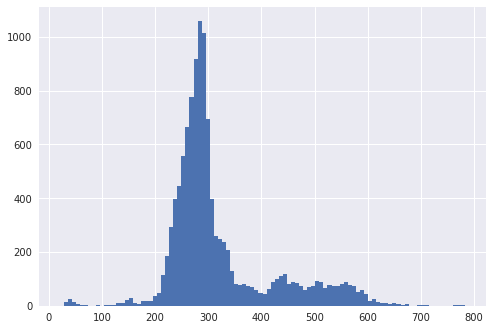

In [22]:
dat.loc[ cut ].rate.hist(bins=100)

## File tranasfer rate distribution for the ana file systems

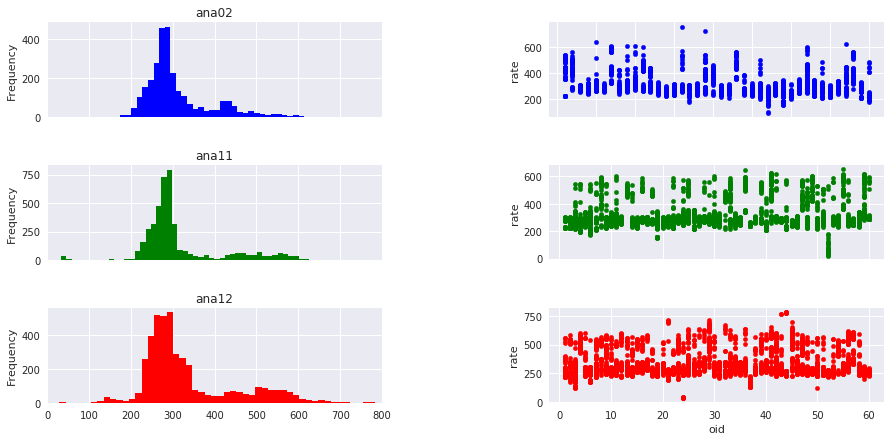

In [23]:
grp = dat.loc[ dat.rate < 1200 ].groupby('fs')
fig, axes = plt.subplots(3,2, figsize=(15,7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
color = ['b', 'g', 'r']
for n, (t, group) in enumerate(grp):
    t = "ana{:02d}".format(int(t))
    group.rate.plot(kind='hist', bins=50, ax=axes[n][0], title=t, sharex=True, xlim=(0,800), color=color[n])
    group.plot(kind='scatter', x='oid', y='rate', ax=axes[n][1], color=color[n])

# Per OST stats
group the data by (filesystem number, OST-id)

In [24]:
grp1 = dat.loc[ cut ]. groupby(['fs','oid'])

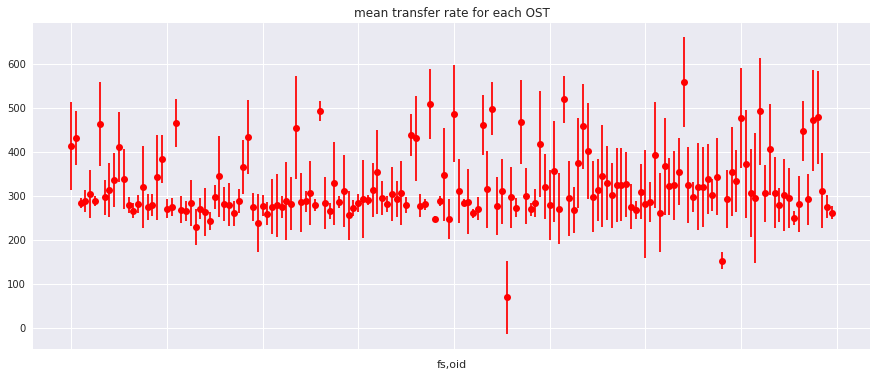

In [25]:
fig = plt.figure(figsize=(15,6))
grp1.rate.mean().plot(fmt='ro', yerr=grp1.rate.std(), grid=True, title="mean transfer rate for each OST")

# Per file statistics
As a file was read many times we can create the mean and std.
The transfer stats for each file are grouped together to calculate the mean
and std.

In [26]:
grpfn = dat.loc[ dat.rate < 1000 ].groupby('fn')

In [27]:
#grpfn.groups

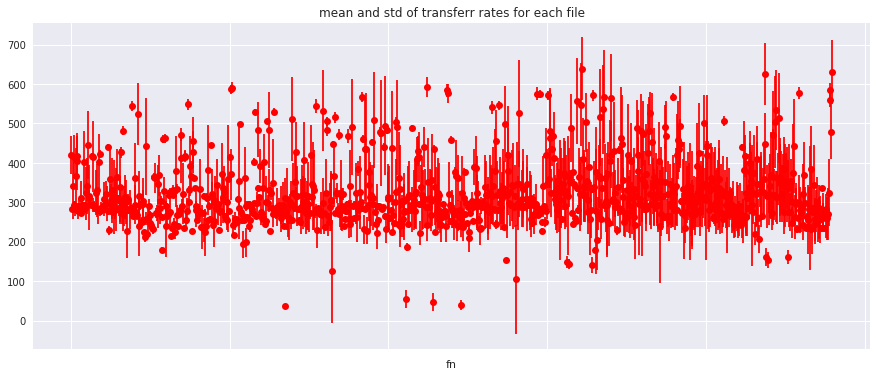

In [28]:
grpfn.rate.mean().plot(fmt='ro', yerr=grpfn.rate.std(), grid=True, figsize=(15,6), title="mean and std of transferr rates for each file")

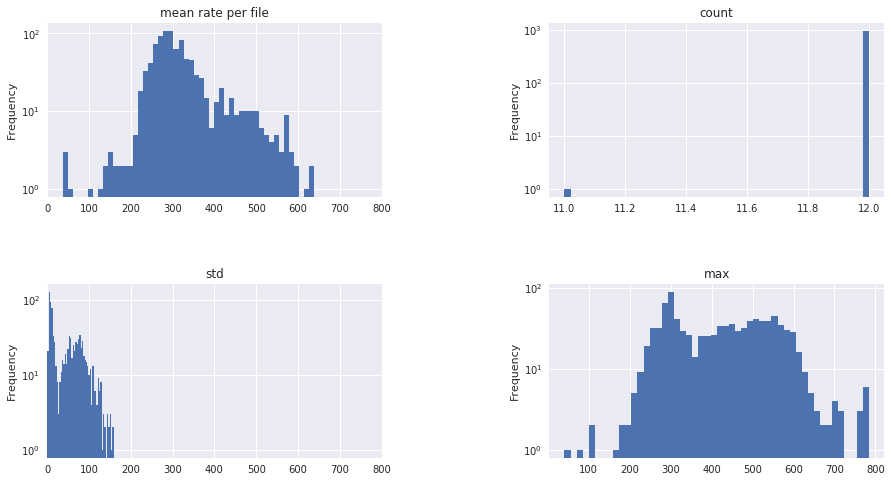

In [29]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
#grpfn.rate.mean().hist()
grpfn.rate.mean().plot(kind='hist', bins=50, ax=axes[0][0], title="mean rate per file", xlim=(0,800), logy=True)
grpfn.rate.std().plot(kind='hist', bins=50, ax=axes[1][0], title="std", xlim=(0,800), logy=True)
grpfn.rate.count().plot(kind='hist', bins=50, ax=axes[0][1], title="count", logy=True)
grpfn.rate.max().plot(kind='hist', bins=50, ax=axes[1][1], title="max", logy=True)